# Comp 551 : Mini Project 3


This notebook contains the code for implementation of the CNN using pytorch

#### Loading modules

In [ ]:
import numpy as np
import pandas as pd
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
from keras.datasets import fashion_mnist
warnings.filterwarnings('ignore')

# Task 1: Acquire, preprocess, and analyze the data

In [ ]:
def normalize(x, axis=0):
  x= x - np.mean(x, axis=0) 
  x= x/ np.std(x, axis=0)
  return(x)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
d1, d2, d3 = x_train.shape
x_train=  x_train.reshape((d1, d2*d3))
d1, d2, d3 = x_test.shape
x_test = x_test.reshape((d1, d2*d3))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train_raw=x_train
x_test_raw=x_test

In [ ]:
x_train= normalize(x_train)
x_test = normalize(x_test)

In [ ]:
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [ ]:
x_train[1:10, 1:10]

array([[-0.02322333, -0.03917806, -0.04132172, -0.05764574,  0.10043738,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034,  0.19802309],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259,  1.14539285,  2.13497356],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172,  0.17322968, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034,  0.19802309],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574,  0.10043738,
         0.02146044, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0

In [ ]:
x_train_raw[1:10,1:10]

array([[ 0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0,  0, 33, 96],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [ ]:
x_test[1:10, 1:10]

array([[-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.18605403, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777,  0.17689793],
       [-0.02066217, -0.02378436,  0.91416727, -0.04889502,  0.10577107,
         0.04184234, -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.18605403, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.14230029, -0.29567703],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0

In [ ]:
x_test_raw[1:10,1:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  2,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

# Task 3: Run the experiments

## Task 3.5: Implement CNN

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class CNN(torch.nn.Module):
  def __init__(self,kernel_size,stride):
    super(CNN, self).__init__()
    self.conv1 = torch.nn.Conv2d(1,1,kernel_size,stride)
    self.conv2 = torch.nn.Conv2d(1,1,kernel_size,stride)
    self.conv_img_size = (28//(stride**2)-((kernel_size-1) * 2))*(28//(stride**2)-((kernel_size-1) * 2))
    self.fc1 = torch.nn.Linear(self.conv_img_size,128)
    self.fc2 = torch.nn.Linear(128,128)
    self.out = torch.nn.Linear(128,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1,self.conv_img_size)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x
  
  def train(self,input,target,test_x,test_y,loss_fn,learning_rate,num_steps):
    optimizer = optim.SGD(self.parameters(),lr = learning_rate)
    training_accs = []
    test_accs = []
    for i in range(num_steps):
        optimizer.zero_grad()
        output = self(input)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        training_accs.append(eval_acc_tensor(self(x_test_torch),y_test_torch))
        test_accs.append(eval_acc_tensor(self(x_train_torch),y_train_torch))
    return training_accs, test_accs



In [ ]:
(x_train_torch_raw, y_train_torch), (x_test_torch_raw, y_test_torch) = fashion_mnist.load_data() #getting the data again because it needs to be formatted differently for PyTorch
x_train_torch_raw = torch.tensor(x_train_torch_raw)
y_train_torch = torch.tensor(y_train_torch)#,dtype = torch.float)
x_test_torch_raw = torch.tensor(x_test_torch_raw)
y_test_torch = torch.tensor(y_test_torch)#,dtype = torch.float)

x_train_torch = torch.zeros((60000,1,28,28))
x_test_torch = torch.zeros((10000,1,28,28))

x_train_torch[:,0,:,:] = x_train_torch_raw[:,:,:]
x_test_torch[:,0,:,:] = x_test_torch_raw[:,:,:]

#Dividing the training data set size by 5 because PyTorch kept getting memory usage issues calculating the loss
#x_train_torch = x_train_torch[:12000,:,:,:]
#y_train_torch = y_train_torch[:12000]

print(x_train_torch.shape)
print(y_train_torch.shape)
print(x_test_torch.shape)
print(y_test_torch.shape)

print(x_train_torch.type())
print(x_test_torch.type())
print(y_train_torch.type())
print(y_test_torch.type())

torch.Size([60000, 1, 28, 28])
torch.Size([60000])
torch.Size([10000, 1, 28, 28])
torch.Size([10000])
torch.FloatTensor
torch.FloatTensor
torch.ByteTensor
torch.ByteTensor


In [ ]:
def eval_acc_tensor(y,yh):
  return evaluate_acc(np.argmax(y.detach().numpy(),axis=1),yh.detach().numpy().astype(int))

In [ ]:
cnn = CNN(5,1)
loss_fn_torch = torch.nn.CrossEntropyLoss()
training_accs, test_accs = cnn.train(x_train_torch,y_train_torch,x_test_torch,y_test_torch,loss_fn_torch,0.01,100)

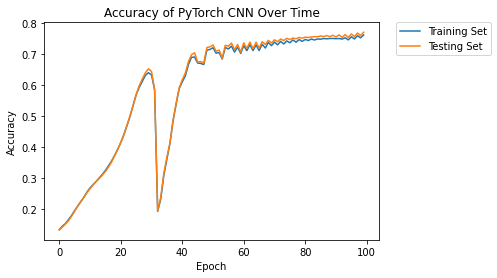

0.7619 0.7707666666666667


In [ ]:
plt.plot(training_accs,label = "Training Set")
plt.plot(test_accs,label = "Testing Set")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Accuracy of PyTorch CNN Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(training_accs[-1],test_accs[-1])